Exploration 3
===

Date: 2017-09-27
    
Aim:
* Plot Wind vs Disp

Note:
* Not sure whether it's really wind speed sensor (lack of documentation)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [2]:
df = pd.read_csv('data2.csv')
df.head()

,id,timestamp,sensor_id,d_st,d_val
0,66547,2017-07-01 00:00:01+00,92,1101,423.6982
1,66728,2017-07-01 00:00:02+00,92,1101,423.7359
2,66820,2017-07-01 00:00:03+00,92,1101,423.7913
3,67014,2017-07-01 00:00:04+00,92,1101,423.8422
4,67213,2017-07-01 00:00:05+00,92,1101,423.9118


In [3]:
df.timestamp.min(), df.timestamp.max()

('2017-07-01 00:00:00+00', '2017-07-12 12:40:58+00')

In [4]:
# To datetime

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S+00')

# Pivot table

table = df.pivot_table(index='timestamp', columns='d_st', values='d_val', aggfunc='mean')

# Resample to 10 min

table = table.resample('600S').mean()

In [5]:
# Rename columns, a b c unused

table.columns = ['disp', 'wind', 'a', 'b', 'c']

In [6]:
table.head()

,disp,wind,a,b,c
timestamp,,,,,
2017-07-01 00:00:00,420.403846,1.4,96.0,2.2,70.0
2017-07-01 00:10:00,418.997525,1.0,121.0,2.1,98.0
2017-07-01 00:20:00,417.719958,0.9,140.0,2.4,177.0
2017-07-01 00:30:00,421.749580,0.4,227.0,0.8,147.0
2017-07-01 00:40:00,425.689713,0.4,248.0,1.2,195.0


In [7]:
table.index.max() - table.index.min()

Timedelta('11 days 12:40:00')

In [8]:
# plt.scatter(y=table.wind.values, x=table.disp.values)
# plt.title('Disp vs Wind speed (12 days worth of data)')
# plt.xlabel('Displacement (Main span truss end post) (mm)')
# plt.ylabel('Wind Speed (m/s)')

In [9]:
# Seperate plots into dates

jk = [group[1] for group in table.groupby(table.index.day)]

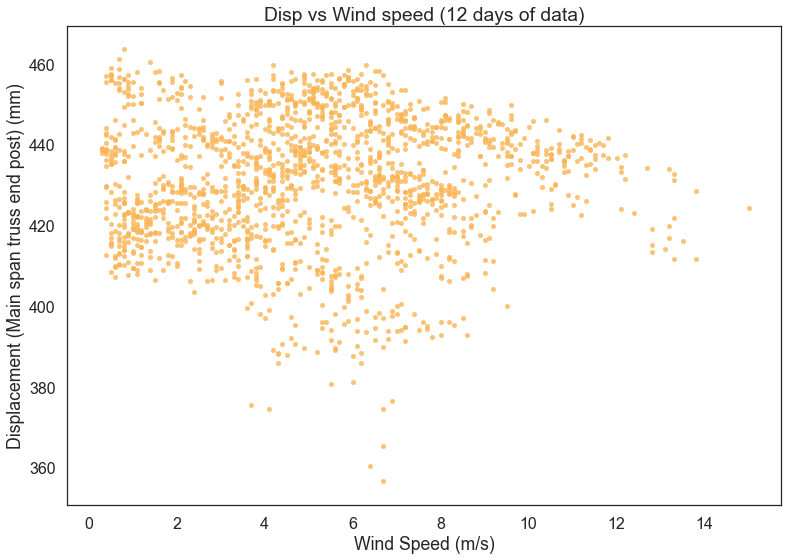

In [11]:
for i in range(0, len(jk)):
    plt.scatter(x=jk[i].wind.values, y=jk[i].disp.values, s=20, alpha=0.8, c='#fbb455')
    plt.title('Disp vs Wind speed (12 days of data)')
    plt.ylabel('Displacement (Main span truss end post) (mm)')
    plt.xlabel('Wind Speed (m/s)')
plt.savefig('DispVSWind.png')

In [59]:
def rush(x):
    if x > 7 and x < 9:
        return 'yes'
    if x > 17 and x < 19:
        return 'yes'
    else:
        return 'no'

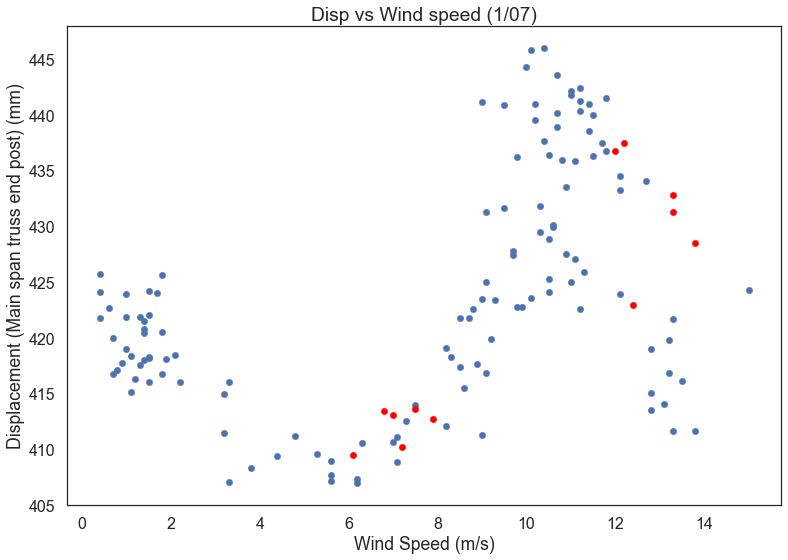

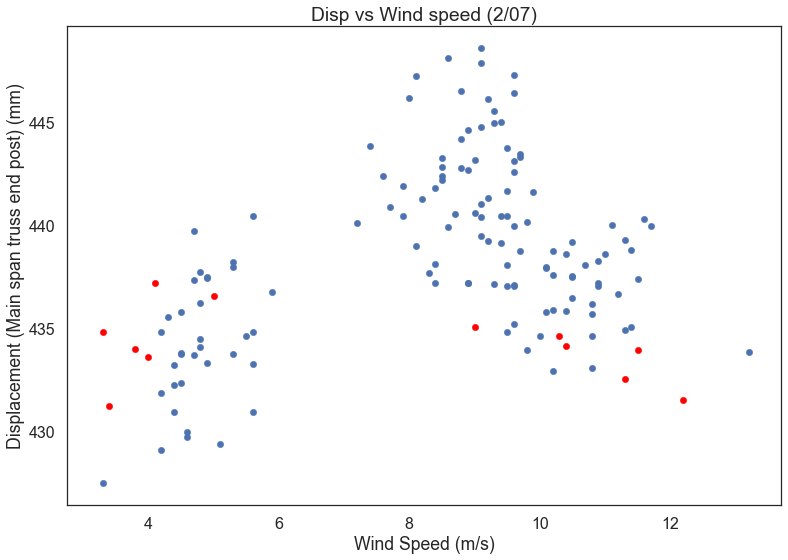

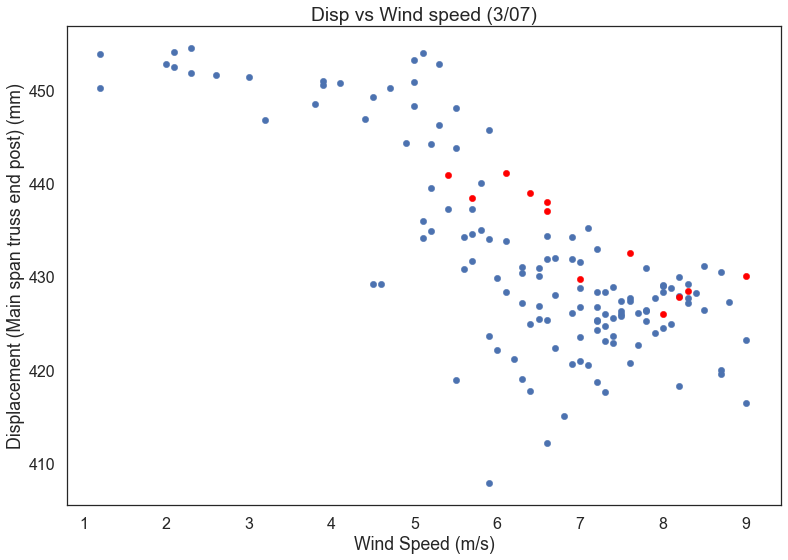

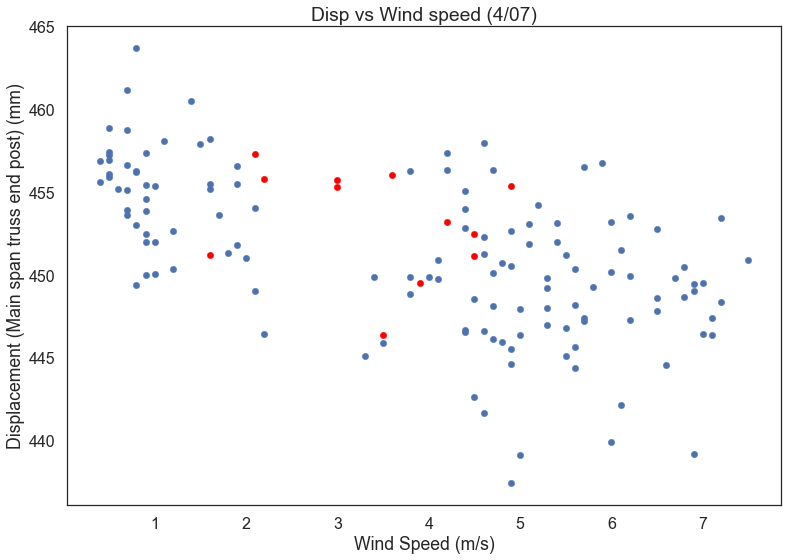

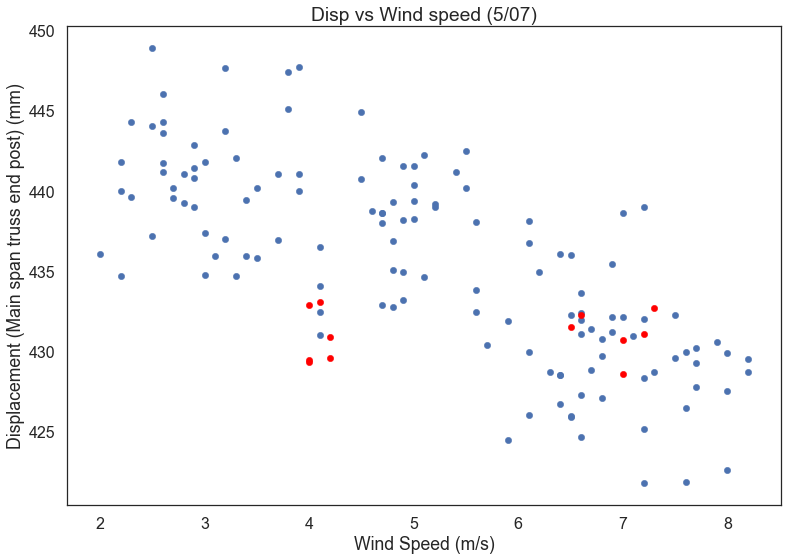

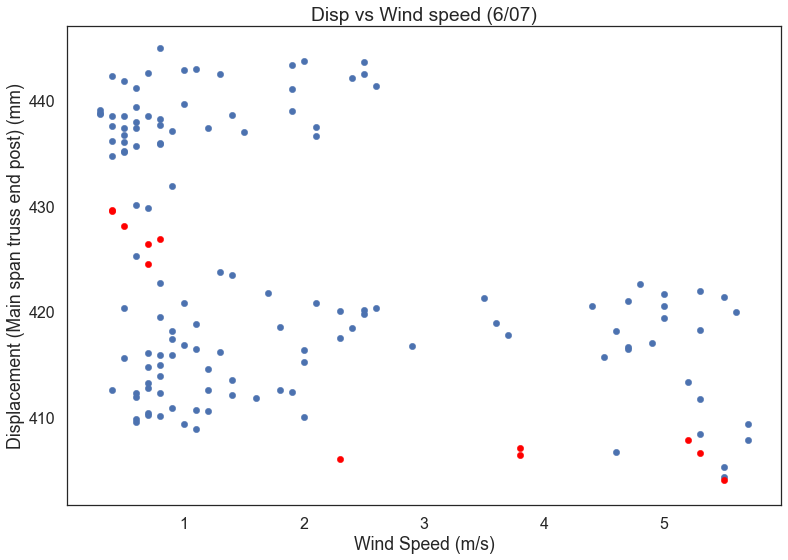

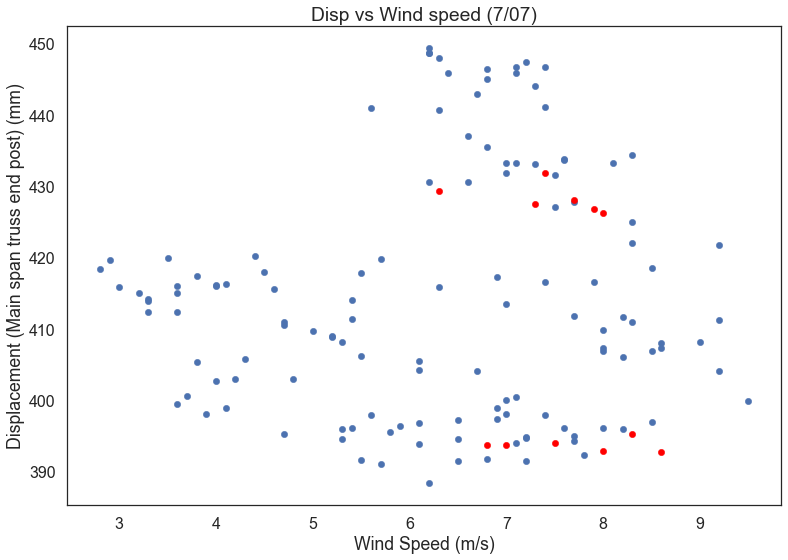

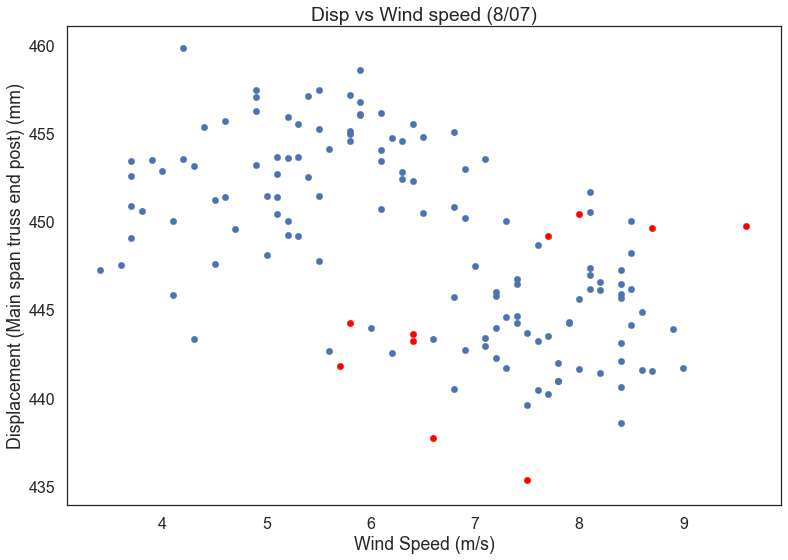

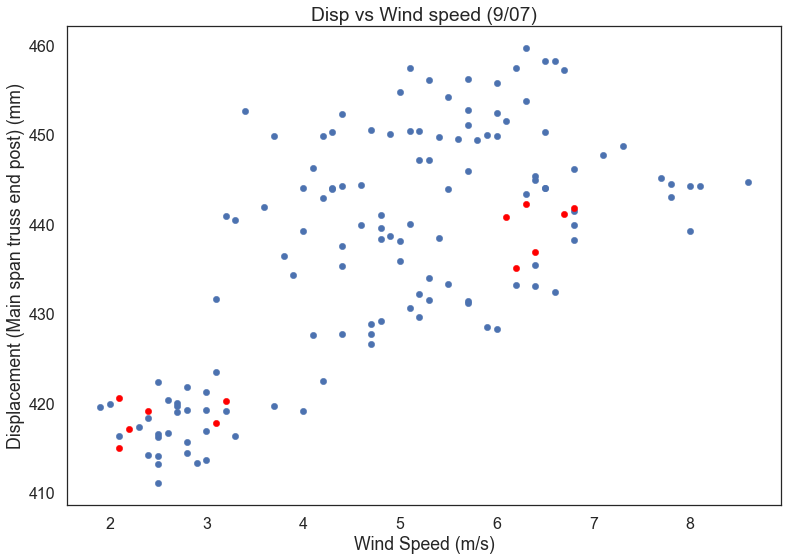

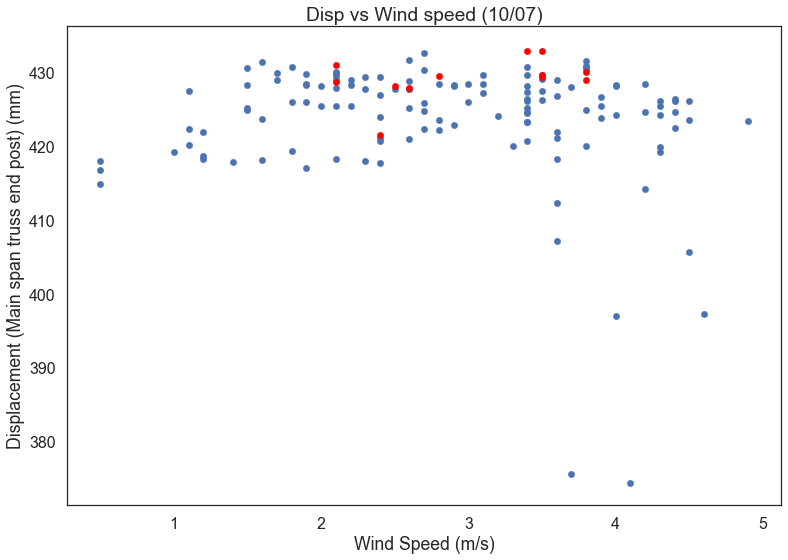

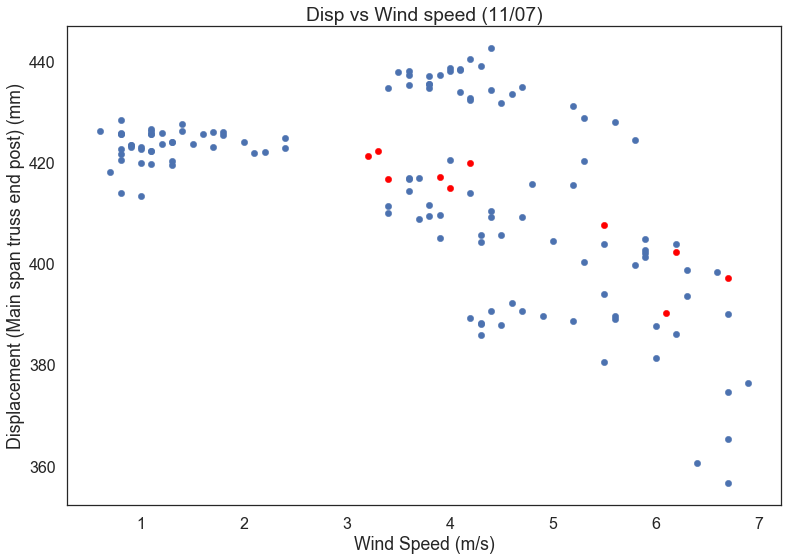

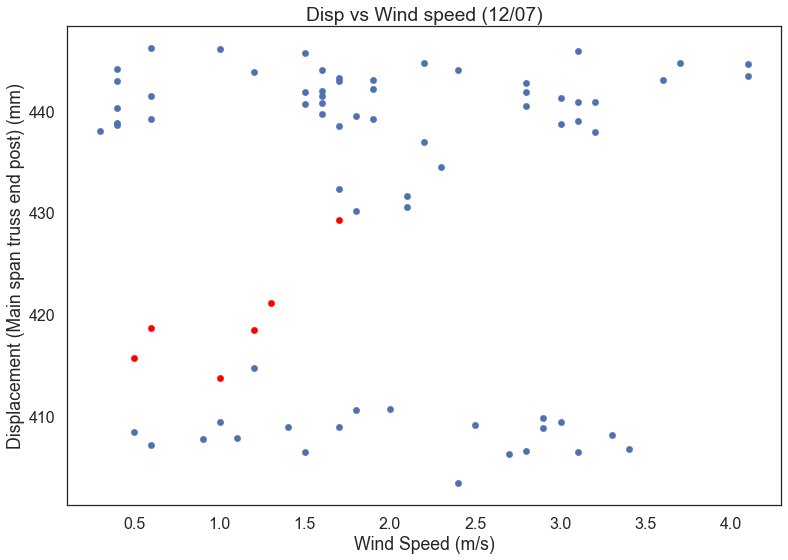

In [82]:
for i in range(0, len(jk)):

    a = jk[i]

    a = a.reset_index()

    a['is_rush_hour'] = a.timestamp.dt.hour.apply(rush)

    a_non_rush = a[a['is_rush_hour'] == 'no']
    a_rush = a[a['is_rush_hour'] == 'yes']
    
    plt.figure()
    plt.scatter(x=a_non_rush.wind.values, y=a_non_rush.disp.values, s=40)
    plt.scatter(x=a_rush.wind.values, y=a_rush.disp.values, s=40, c='red')
    plt.title('Disp vs Wind speed ({}/07)'.format(i+1))
    plt.ylabel('Displacement (Main span truss end post) (mm)')
    plt.xlabel('Wind Speed (m/s)')
    plt.legend

* Try adjust with the zero-displacement
* Possibly influence by other features
* Or it's not the wind data